In [2]:
!pip install pandas -q
!pip install missingno -q
!pip install pyarrow -q
!pip install scipy -q
!pip install tqdm

In [3]:
#Basic imports
import pandas as pd
# Visualisation imports
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from tqdm import tqdm

In [21]:
number_of_dataframes = list(range(44))
#We add number 44, since that's the number of dataframes
number_of_dataframes.append(44)
# We pop the first index which is the value zero, so now we have a list of numbers from 1-44
number_of_dataframes.pop(number_of_dataframes[0])
#Create an empty list to contain the dataframes
df_list = []
# Creating for loop for each dataframe
for number in number_of_dataframes:
    # Using a format string, I can read the dataframes in order (1,2,3,4,5,6) from the list we created earlier
    df_temp = pd.read_parquet(f'/work/imputation_data/data/activity/data_activity_{number}_.parquet', engine = 'pyarrow')
    # We append the temp_dataframes to the empty df_list for storage
    df_list.append(df_temp)
# Now we can access each dataframe more easily directly from this df_list like so:

In [5]:
# Checking first 5 rows of data_activity_1_ (indexes start from 0)
df_list[0].head(5)

,Module_Key,Date_Key,Time_Key,VideoChapter_Key,Userinfo_Key,Feature_Key,Drug_Key,Procedure_Key,ActionCard_Key,Chapter_Key,...,Lat,Lon,EventStart,EventEnd,SessionDuration,SessId,AppId,UserIsActive,SessionNumber_Key,AppVersion_Key
0,-1,2021-12-11,59016,-1,775919,347066,-1,-1,-1,-1,...,None,None,2021-12-11 16:23:36.178000+00:00,2021-12-11 16:23:36.680000+00:00,0.0,a2eac430-5a9e-11ec-ab7a-41d92c280a6c,ba765d00-5a9c-11ec-bdd6-c749520a29f1,0,505616,-1
1,473108,2021-12-27,20997,-1,585576,347067,-1,-1,-1,-1,...,None,None,2021-12-27 05:49:57.511000+00:00,2021-12-27 05:50:00.975000+00:00,3.0,876a1c10-66d8-11ec-a1e4-512054c01e2b,699a7fb0-6f3a-11e9-b7d6-b357b5a2ce6d,1,505620,-1
2,473101,2021-12-30,41836,-1,744918,347069,-1,-1,-1,-1,...,None,None,2021-12-30 11:37:16.997000+00:00,2021-12-30 11:37:20.846000+00:00,4.0,8bf79f30-6964-11ec-bcae-93caf256fbee,fb087900-e546-11eb-b000-99100d311dc1,0,505620,-1
3,-1,2021-12-18,7660,-1,758625,347052,-1,-1,-1,-1,...,9.6675209,39.5266951,2021-12-18 02:07:40.349000+00:00,2021-12-18 02:08:35.101000+00:00,55.0,10a63d30-5fa7-11ec-a311-93260b312c4c,a4835bb0-1a0a-11ec-871e-e7776d56d3c0,1,505620,-1
4,473108,2021-12-27,4933,-1,778345,347048,-1,-1,-1,473119,...,None,None,2021-12-27 01:22:13.796000+00:00,2021-12-27 01:22:15.991000+00:00,2.0,26b889d0-66b3-11ec-a9de-a90b7f5503c7,6e5e0df0-63de-11ec-9d81-eb3ec0e6f69b,0,505620,-1


<AxesSubplot:>

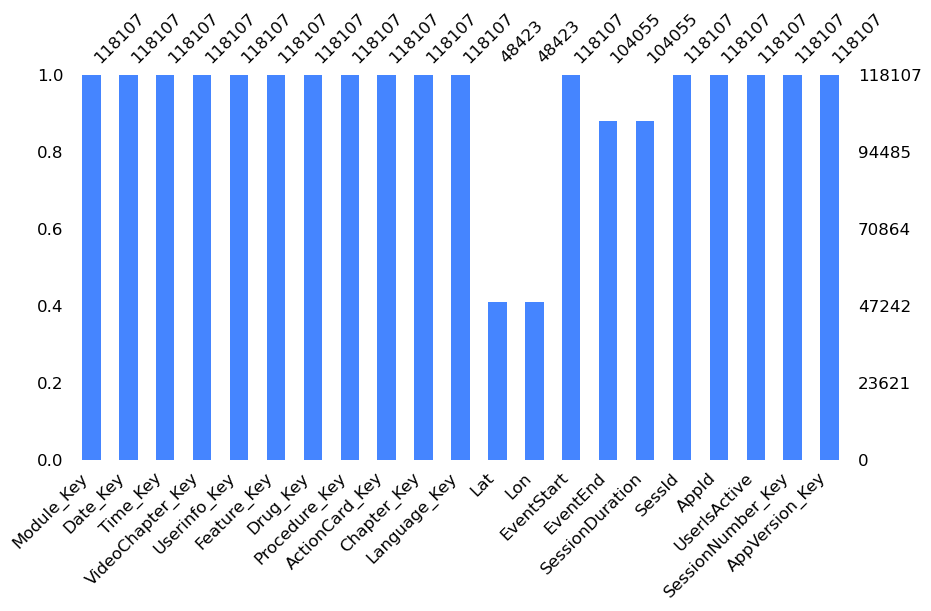

In [11]:
# Checking distribution of missing value for data_activity_1_:
msno.bar(df_list[0], figsize=(10,5), fontsize=(12), color=(0.27,0.52,1.0))

<AxesSubplot:>

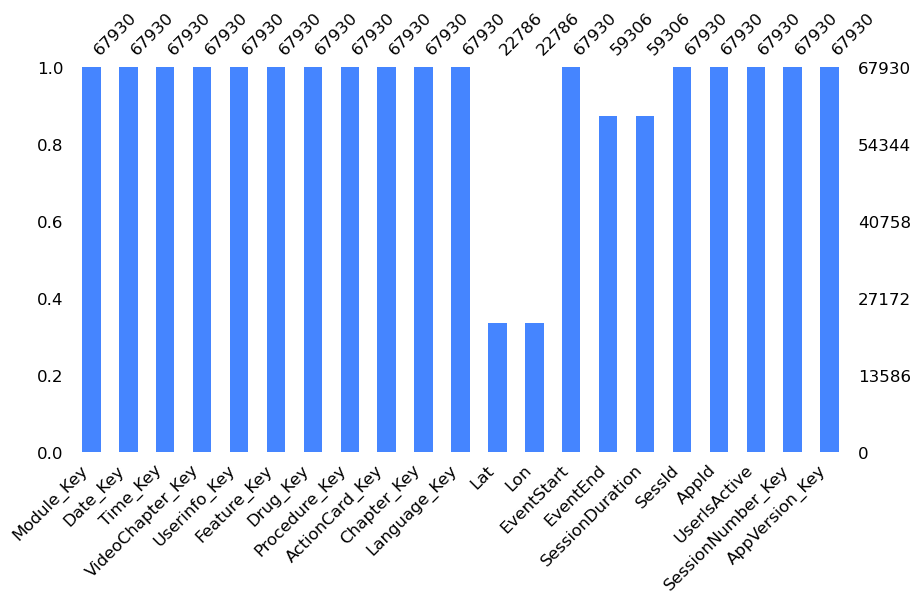

In [10]:
# Checking distribution of missing value for data_activity_2_:
msno.bar(df_list[1], figsize=(10,5), fontsize=(12), color=(0.27,0.52,1.0))

<AxesSubplot:>

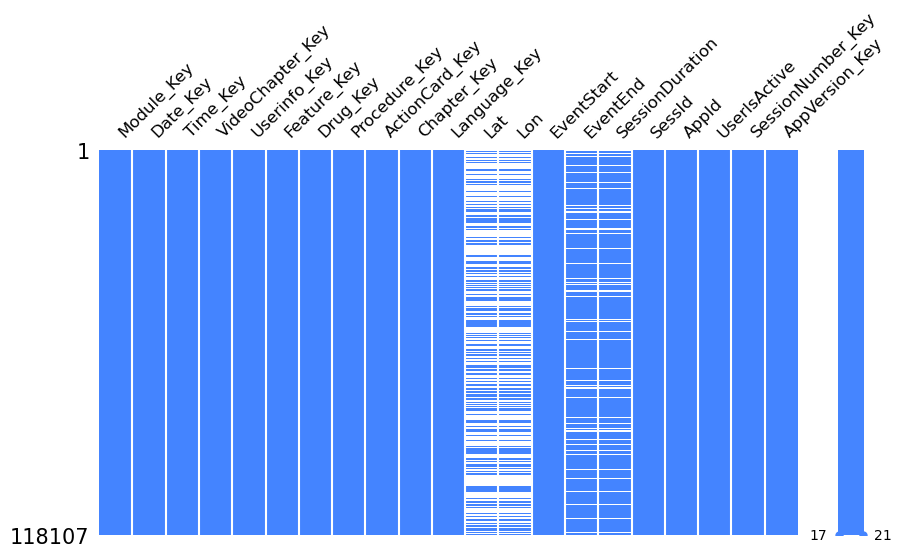

In [9]:
msno.matrix(df_list[0], figsize=(10,5), fontsize=(12), color=(0.27,0.52,1.0))

In [12]:
df_users = pd.read_parquet('/work/imputation_data/data/users/data_users.parquet', engine = 'pyarrow')

In [6]:
df_users.head(5)

,Userinfo_Key,Userinfo_BK,Country_Key,UserinfoAppId,RN,OnlyUser,NumberOfUsers,UserinfoCountry,UserinfoState,UserinfoDistrict,HealthcareWorker,Profession,Experiance,WorkPlace,SafeDeliveryApp,UserinfoNumberOfDelivery,UserinfoIsMyLearning,UserinfoUserIsActive,UserInfoFirstMyLearningEventDate,UserInfoFirstUseDate
0,473799,000801d0-2cce-11e8-a399-c1bdae18f458,487380,000801d0-2cce-11e8-a399-c1bdae18f458,4.0,Unknown,Unknown,India,Unknown,Unknown,Yes,Unknown,Unknown,Secondary health facility,Unknown,1-25,1.0,0.0,2018-05-08 00:00:00+00:00,2018-03-21 00:00:00+00:00
1,473800,000ee170-9ef9-11e7-a591-416ed07c8dcf,487366,000ee170-9ef9-11e7-a591-416ed07c8dcf,4.0,Unknown,Unknown,Ethiopia,Unknown,Unknown,Yes,Unknown,Unknown,Nursing College,Unknown,50+,1.0,0.0,2017-09-21 00:00:00+00:00,2017-09-21 00:00:00+00:00
2,473805,00314540-ef84-11e7-a35f-779c88a1cf9f,487380,00314540-ef84-11e7-a35f-779c88a1cf9f,4.0,Unknown,Unknown,India,Unknown,Unknown,Yes,Unknown,Unknown,Primary health facility,Unknown,1-25,1.0,0.0,2018-01-02 00:00:00+00:00,2018-01-02 00:00:00+00:00
3,473811,004a2bd0-64b1-11e8-93dd-9fce00d950fa,487380,004a2bd0-64b1-11e8-93dd-9fce00d950fa,4.0,Unknown,Unknown,India,Unknown,Unknown,Yes,Unknown,Unknown,Primary health facility,Unknown,50+,1.0,0.0,2018-05-31 00:00:00+00:00,2018-05-31 00:00:00+00:00
4,473814,00578ea0-f379-11e7-8230-019453182d2d,487380,00578ea0-f379-11e7-8230-019453182d2d,4.0,Unknown,Unknown,India,Unknown,Unknown,Yes,Unknown,Unknown,Primary health facility,Unknown,26-50,1.0,0.0,2018-01-12 00:00:00+00:00,2018-01-07 00:00:00+00:00


<AxesSubplot:>

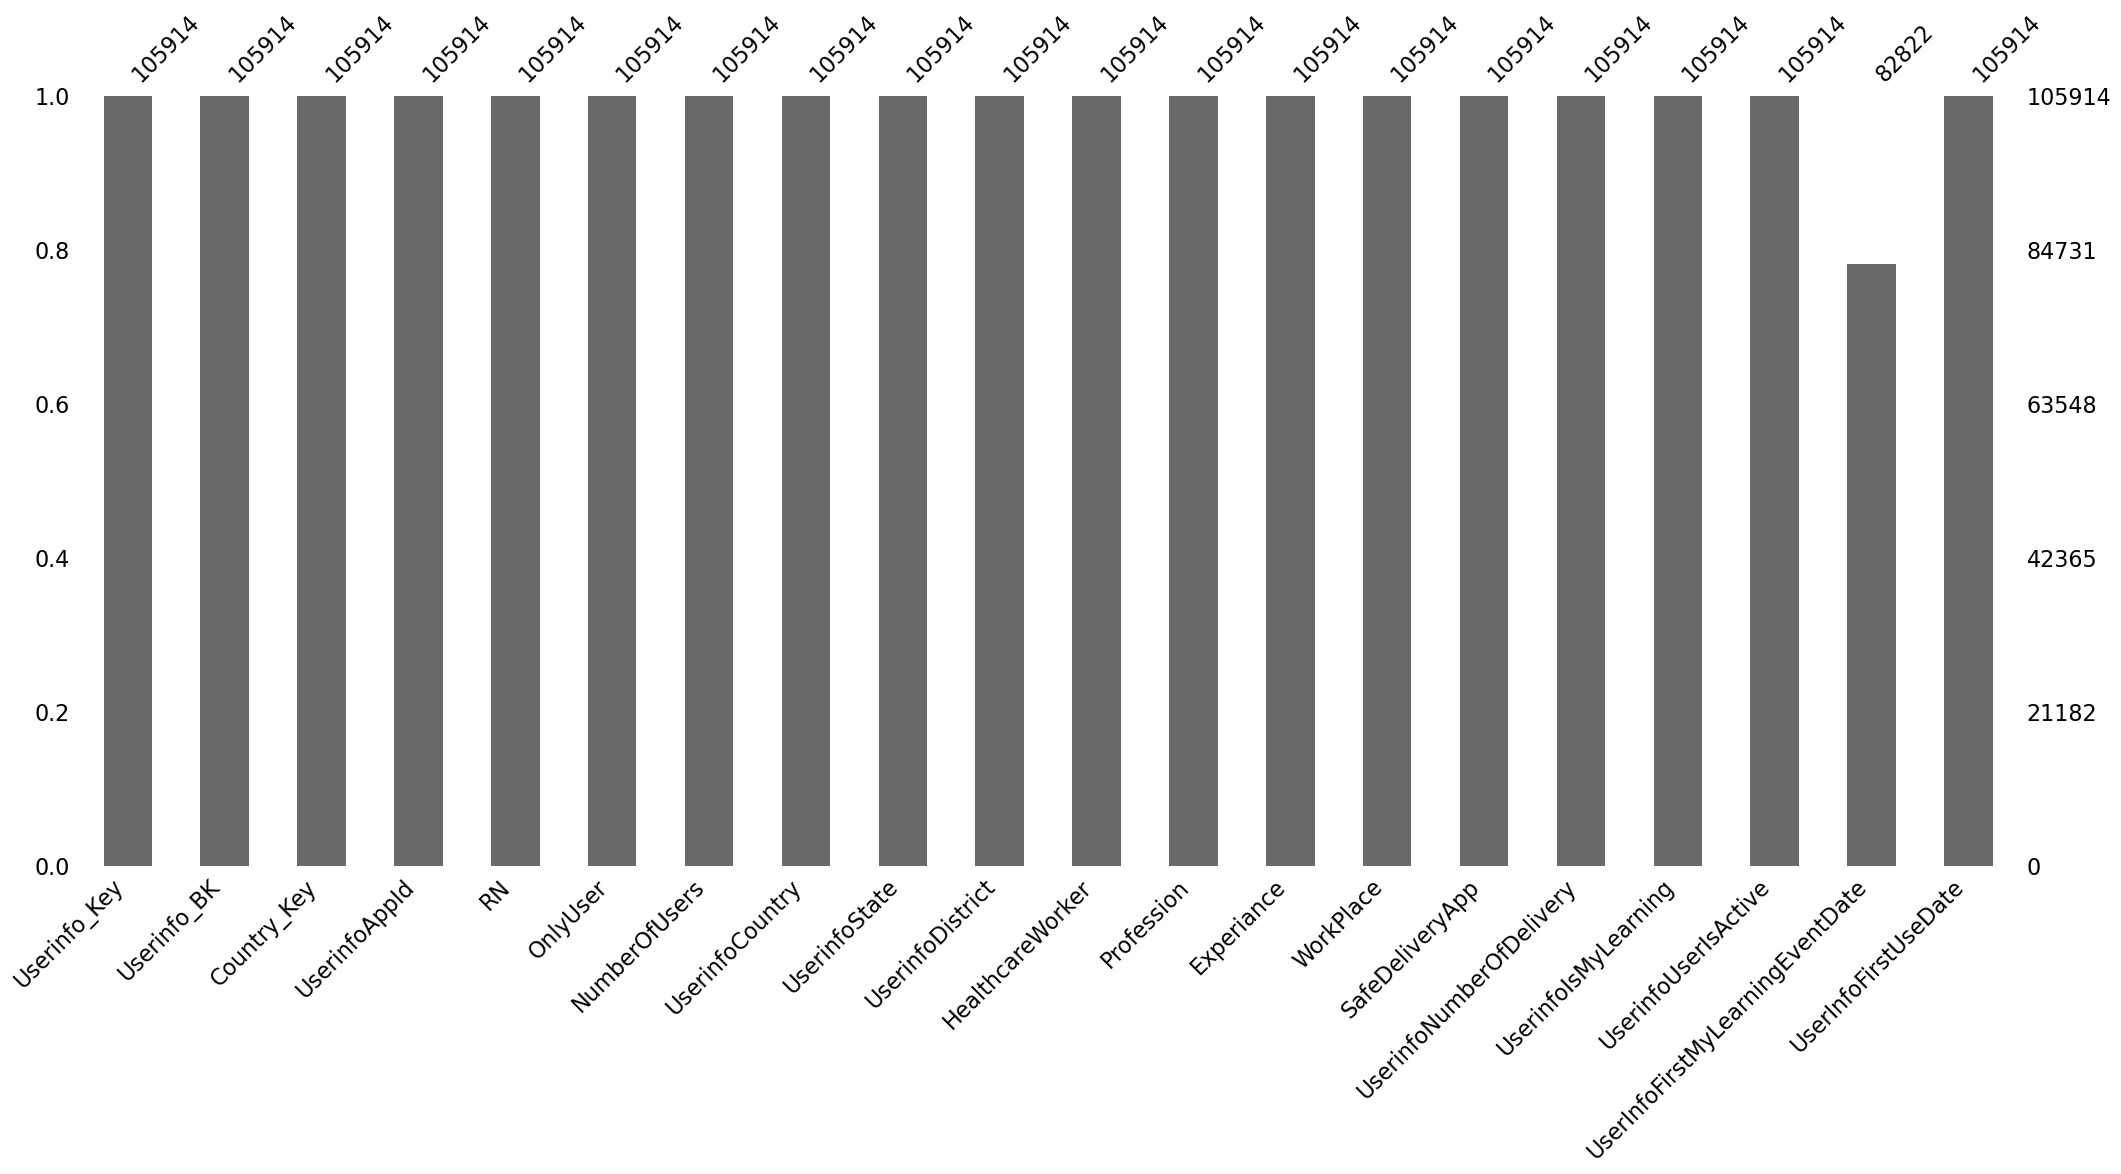

In [72]:
# This is interesting. From the quick look at the dataframe above, it looks like some of the dimensions values they potentially want imputed are denoted with
# the string 'Unknown'. We would need to turn these into nans for the purpose of imputation.
msno.bar(df_users)

In [13]:
df_users_nanified = df_users.replace('Unknown', np.nan)

In [8]:
df_users_nanified.head(5)

,Userinfo_Key,Userinfo_BK,Country_Key,UserinfoAppId,RN,OnlyUser,NumberOfUsers,UserinfoCountry,UserinfoState,UserinfoDistrict,HealthcareWorker,Profession,Experiance,WorkPlace,SafeDeliveryApp,UserinfoNumberOfDelivery,UserinfoIsMyLearning,UserinfoUserIsActive,UserInfoFirstMyLearningEventDate,UserInfoFirstUseDate
0,473799,000801d0-2cce-11e8-a399-c1bdae18f458,487380,000801d0-2cce-11e8-a399-c1bdae18f458,4.0,NaN,NaN,India,NaN,NaN,Yes,NaN,NaN,Secondary health facility,NaN,1-25,1.0,0.0,2018-05-08 00:00:00+00:00,2018-03-21 00:00:00+00:00
1,473800,000ee170-9ef9-11e7-a591-416ed07c8dcf,487366,000ee170-9ef9-11e7-a591-416ed07c8dcf,4.0,NaN,NaN,Ethiopia,NaN,NaN,Yes,NaN,NaN,Nursing College,NaN,50+,1.0,0.0,2017-09-21 00:00:00+00:00,2017-09-21 00:00:00+00:00
2,473805,00314540-ef84-11e7-a35f-779c88a1cf9f,487380,00314540-ef84-11e7-a35f-779c88a1cf9f,4.0,NaN,NaN,India,NaN,NaN,Yes,NaN,NaN,Primary health facility,NaN,1-25,1.0,0.0,2018-01-02 00:00:00+00:00,2018-01-02 00:00:00+00:00
3,473811,004a2bd0-64b1-11e8-93dd-9fce00d950fa,487380,004a2bd0-64b1-11e8-93dd-9fce00d950fa,4.0,NaN,NaN,India,NaN,NaN,Yes,NaN,NaN,Primary health facility,NaN,50+,1.0,0.0,2018-05-31 00:00:00+00:00,2018-05-31 00:00:00+00:00
4,473814,00578ea0-f379-11e7-8230-019453182d2d,487380,00578ea0-f379-11e7-8230-019453182d2d,4.0,NaN,NaN,India,NaN,NaN,Yes,NaN,NaN,Primary health facility,NaN,26-50,1.0,0.0,2018-01-12 00:00:00+00:00,2018-01-07 00:00:00+00:00


<AxesSubplot:>

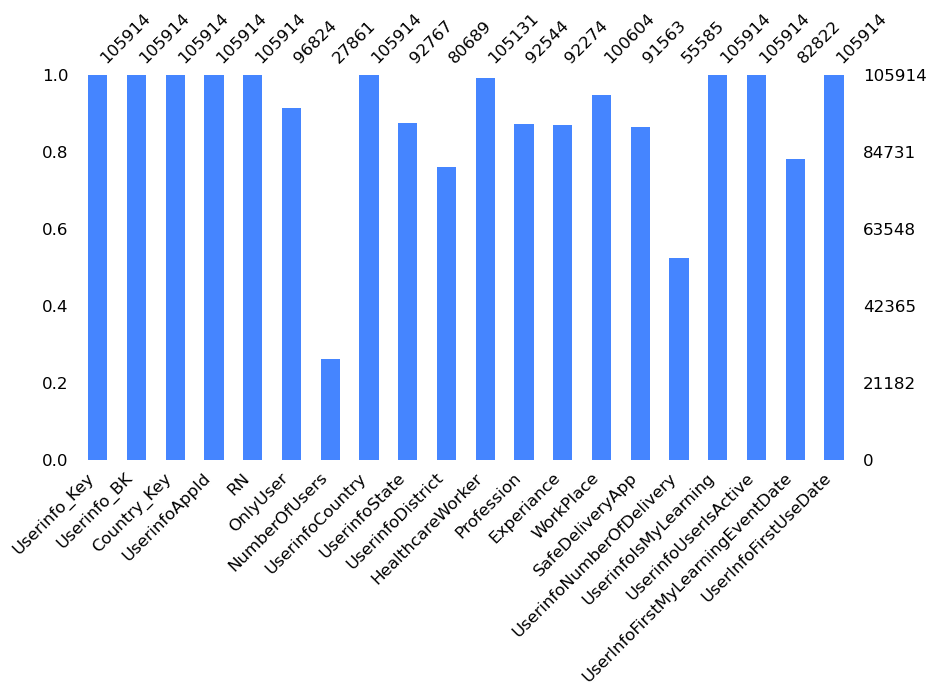

In [6]:
# Now we can visualize the missing values using missingno:
msno.bar(df_users_nanified, figsize=(10,5), fontsize=(12), color=(0.27,0.52,1.0))

<AxesSubplot:>

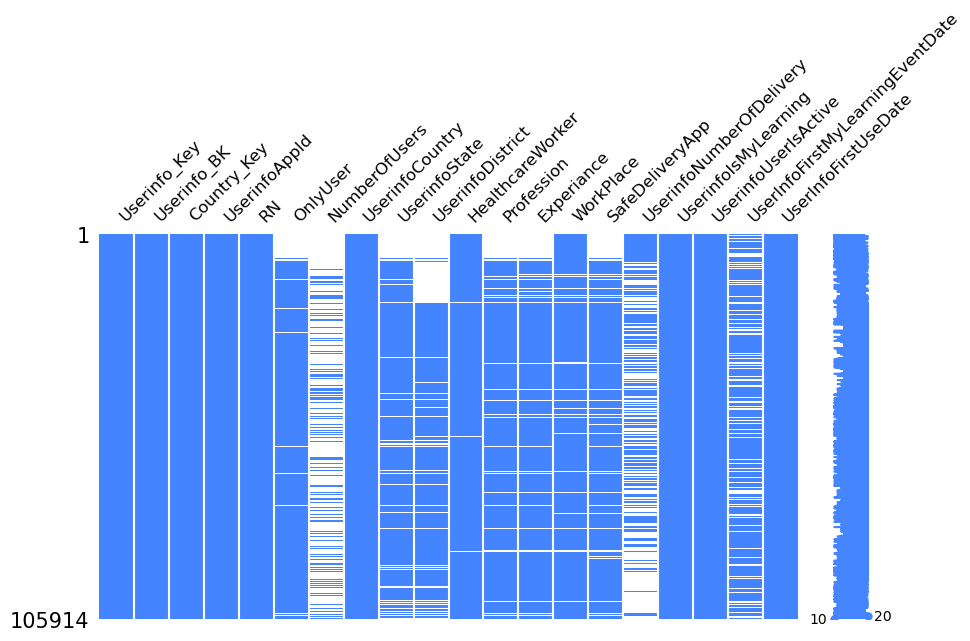

In [7]:
msno.matrix(df_users_nanified, figsize=(10,5), fontsize=(12), color=(0.27,0.52,1.0))

In [ ]:
df_users_nanified.loc[df_users_nanified['SafeDeliveryApp'] = notnull()]

In [33]:
# From the get-go I see a few valuables dimensions. 

# UserinfoNumberOfDelivery, professions, experience and workplace are very valuable for imputation.

# We need to remember a logical order to these imputations, as mismatching the district, state and country data could happen relatively easily with just a single imputation step.
# The imputation of lat/lon data, assuming we can cross-val check the values for a high percentage of certainty, could then possibly be used to somehow impute into UserInfoState
# and UserInfoDistrict.

In [10]:
# Now, for some of the dimensions/features, we have certain keys to describe what the variable is more precisely about;
# For the ModuleKeys, it seems to describe which specific module/area of interest the users have entered, with -1 being Unkown, and -2 being blank
df_module_dim = pd.read_parquet('/work/imputation_data/data/modules/module_dimension.parquet',engine='pyarrow')
df_module_dim

,Module_Key,ModuleName
0,-2,Blank
1,-1,Unknown
2,473100,Active_Management_of_Third_Stage_Labour
3,473101,Infection_Prevention
4,473102,Manual_Removal_of_Placenta
5,473103,Female_Genital_Mutilation
6,473104,Hypertension
7,473105,Neonatal_Resuscitation
8,473106,Post_Partum_Hemorrhage
9,473107,Maternal_Sepsis


In [9]:
# The feature dimensions seem to describe more specific actions that a user can perform within the application
# Whether or not these features have to be considered for imputation is hard to say at this point, without further details as to which dimensions they 'need' as unkowns/blanks
# and whether or not this is the simply the way they tag their NaN's
df_feat_dim = pd.read_parquet('/work/imputation_data/data/modules/feature_dimension.parquet',engine='pyarrow')
df_feat_dim

,Feature_Key,FeatureName,Relevant
0,-2,Blank,NaN
1,-1,Unknown,NaN
2,347036,acceptTerms,NaN
3,347037,Action_Cards,1.0
4,347038,actioncardList,1.0
...,...,...,...
69,751331,pinchToZoom,NaN
70,763178,learnMore,1.0
71,763179,reviewResults,1.0
72,763180,seeWhy,1.0


<AxesSubplot:>

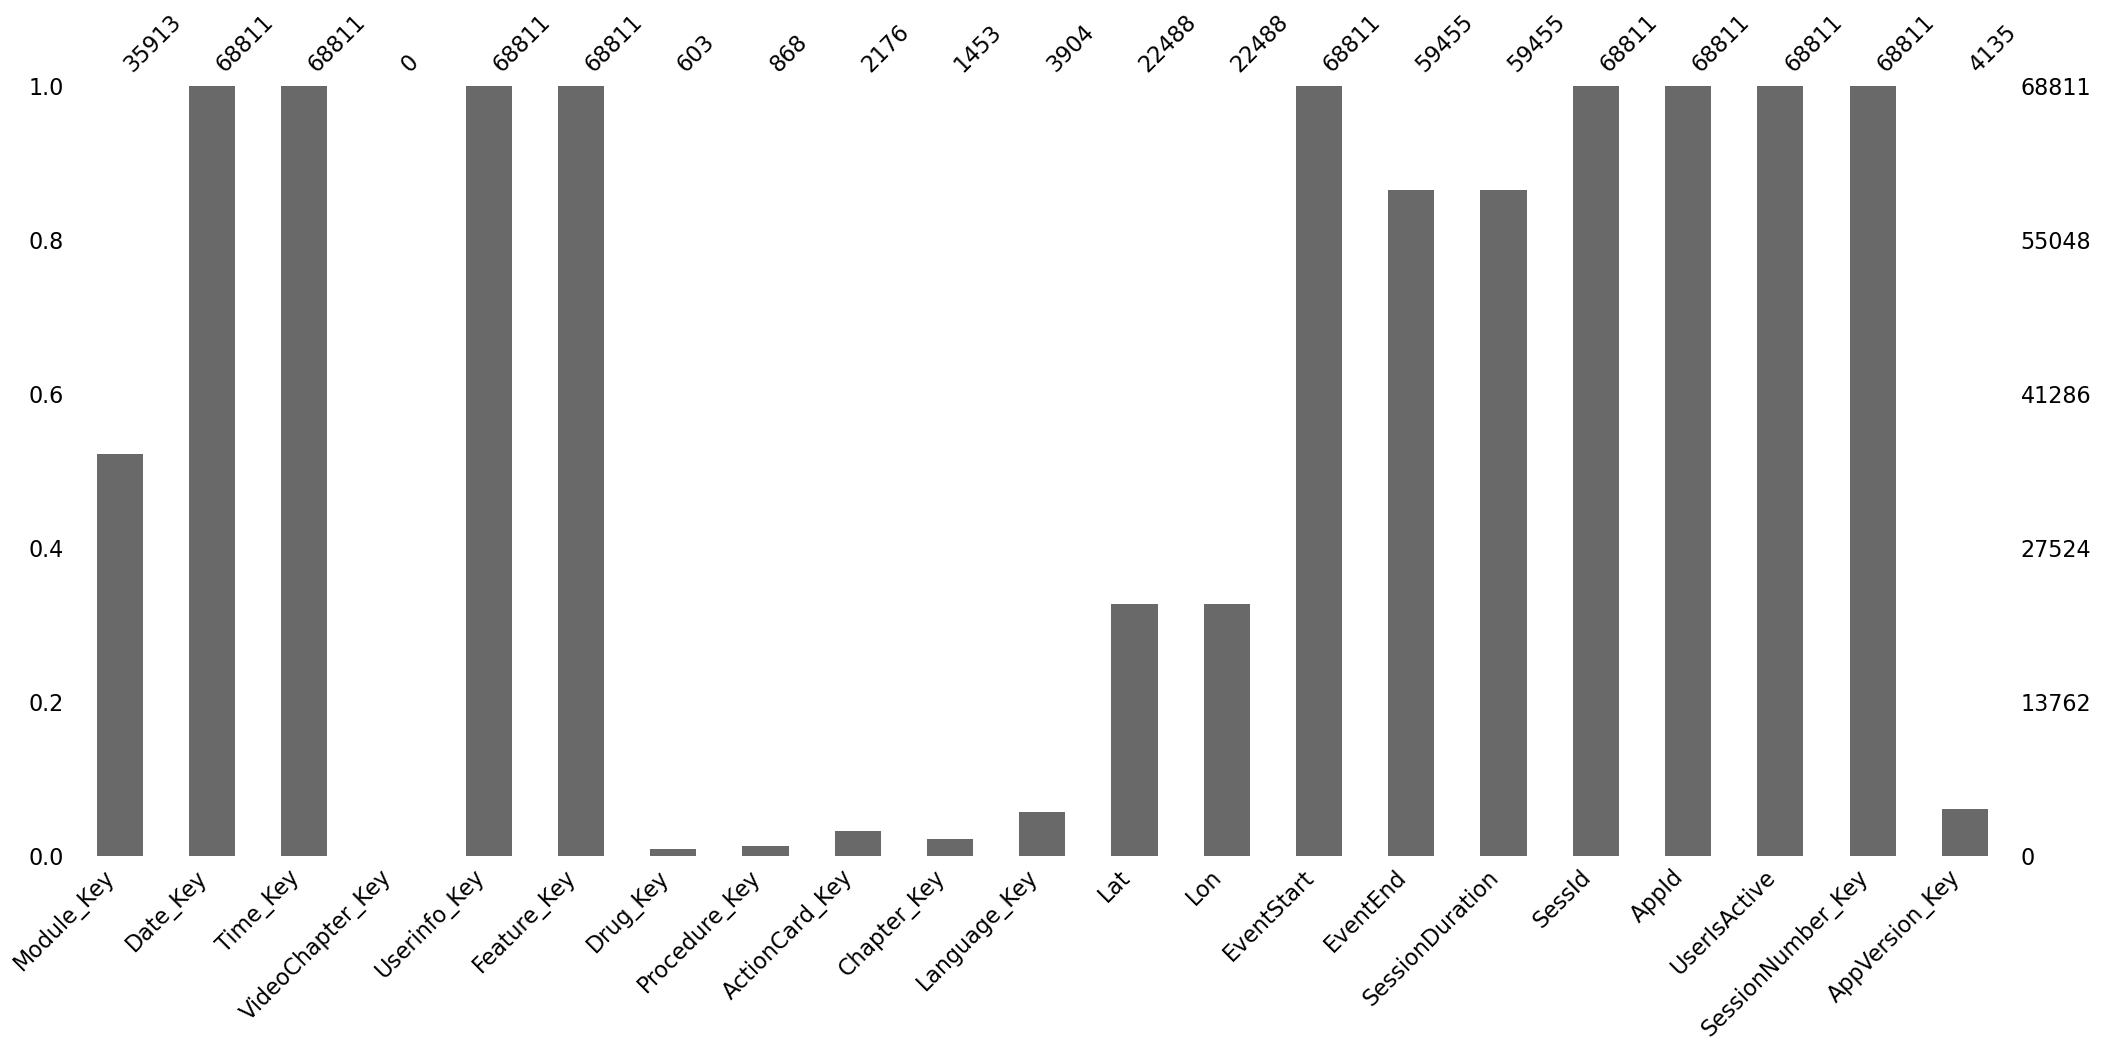

In [53]:
# Let's check with distribution with FeatureKey/DimensionKey = -1 ('Unknown') counting as NaN (missing value);
# Since I performed a check for percentages of ModuleKey = -2 further down, it was not necessary to look for -2 here since the percentage across all activity data was 0.0
msno.bar(df_list[2].replace('-1',np.nan))